# Introduction

These notebooks describe how to undertake analyses introduced as examples in the
Ninth Edition of *Introduction to the Practice of Statistics* (2017) by Moore, McCabe, and Craig.
The data used in the notebooks are from the R version of the notebooks found at https://nhorton.people.amherst.edu/ips9/.

## Setup

First load the IPS (short for *Introduction to the Practice of Statistics*) package and dependencies. If you're doing this for the first time, there may be a great deal more output as the dependent packages are download and compiled. This typically only happens once.

In [1]:
(ql:quickload :ips)

To load "ips":
  Load 1 ASDF system:
    ips
; Loading "ips"
[package yason.system]........

(:IPS)

In [2]:
(in-package :ips)

#<PACKAGE "IPS">

## Example 1.1 Restaurant discount coupons

The first example defines the terms cases, labels and variables as they are used in statistical analysis. To load the example, use the following command:

In [3]:
(load #P"IPS:DATA;coupons")

T


;;   TYPE    NAME             ITEM           REG-PRICE DISC-PRICE
;; 0 Italian Domo's           Pizza                 20         10
;; 1 Italian Mama Rita's      Pizza                 20         12
;; 2 BBQ     Smokey McSween's Barbecue              30         17
;; 3 BBQ     Smokey Grill     Ribs                  20         11
;; 4 Mexican Dos Amigos       Tacos                 16          8
;; 5 Mexican Holy Guacamole   Steak fajitas         13          8
;; 6 Seafood Sea Grill        Shrimp platter        20         11



These are the cases. Data for each coupon is listed on a different line, and the first column has the coupons numbered 0 to 6. Lisp numbering starts at 0. The remaining columns give the type of restaurant, the name of the restaurant, the item being discounted, the regular price and the discount price. Together this information, that is the information about the data, is known as 'meta-data', and collectively referred to as the 'data dictionary' associated with the data set.

### Example 1.2 Categorical and quantitative variables for coupons

The restaurant discount data set has six variables (rows): coupon number, type of restaurant, name of restaurant, item, regular price and discount price. The two price variables are _quantitative_ variables. Coupon number, type of restaurant, name of restaurant and item are _categorical_ variables.

We can see the variable types and other information in Lisp-Stat using the [describe](http://www.lispworks.com/documentation/lw70/CLHS/Body/f_descri.htm) command. To see the key characteristics of a data set (the data dictionary) for the coupon data set:

In [4]:
(describe coupons)

COUPONS
  A data-frame with 7 observations of 5 variables

Variable   | Type        | Unit | Label                   
--------   | ----        | ---- | -----------             
TYPE       | CATEGORICAL | NIL  | Type of restaurant      
NAME       | CATEGORICAL | NIL  | Name of restaurant      
ITEM       | CATEGORICAL | NIL  | Discounted item         
REG-PRICE  | INTEGER     | USD  | Regular price of item   
DISC-PRICE | INTEGER     | USD  | Discounted price of item


### Example 1.6 Comparing colleges based on graduates

This example adjusts one variable to create another. In this case we want to compare the graduation rate among colleges, and to compare apples to apples, need to adjust for the total student population. This is simple division. In College A there were 1000 first year students, and 800 graduated within 6 years, so the graduation rate is:

In [5]:
(/ 800 1000)

4/5

College B has 2000 students who entered the same year, and 1200 graduated within 6 years. College B's graduation rate is:

In [6]:
(/ 1200 2000)

3/5

Note two things about these calculations:

1. Lisp-Stat uses [prefix notation](https://en.wikipedia.org/wiki/Polish_notation). This means parentheses are not required for grouping operations. There is no ambiguity.
2. Results are returned in rational format. Most systems use floating point, and have limited accuracy. Rational numbers are exact, and this is great for statistical work.

# 1.2 Displaying distributions with graphs

This chapter of the text describes exploratory data analysis and suggests two basic strategies:

- Examining each variable in isloation, then study the relationships among the variables
- Begin with plotting the variables, then add numerical summaries of specific aspects of the data

This chapter presents methods for analysing a single variable, beginning first with graphical display, then adding numerical summaries for a more complete description.

## Categorical variables: Bar graphs and pie charts

The values of a categorical variable are labels for the categories, such as 'male' and 'female'. The distribution of a categorical variable lists the categories and gives either the _count_ or the _percent_ of cases that fall in each category. An alternative to the percent is the proportion, the count divided by the sum of the counts. Note that the percent is simply the proportion times 100.

### Example 1.7 How do you do online research?

In example 1.7, the distribution of a categorical variable is examined along with a demonstration of the count of each catagory as a percentage of the total. The data set is the preferences for online information resources taken from a survey of 552 first year university students.

First, read the data into a data frame with the name 'online'. Note that we're not using the usual convention of \*earmuffs\* on the variable name. The example data sets are named after the example number in the book, e.g. example 1.7 data is named eg01-07.

In [7]:
(defdf online (read-csv ips:eg01-07))

#<DATA-FRAME (4 observations of 2 variables)>

We can view the counts by using the `print-data` function:

In [8]:
(print-data online)

NIL


;;   SOURCE    COUNT
;; 0 Google      406
;; 1 Library      75
;; 2 Wikipedia    52
;; 3 Other        19


Here we see the results presented as a summary. To see it as percentage, we need to determine the total counts and divide.

### Example 1.8 Favorites as percents

First we determine the total count:

In [9]:
(sum online:count)

552

And now divide each count by the total and multiply by 100 to get the percentage:

In [10]:
(e* 100
    (e/ online:count 552.0))

#(73.55073 13.586956 9.42029 3.442029)

Notice the mathmatical operators were prefixed by '_e_'. This prefix signifies _elementwise_ operations. That is
the operator accepts either vectors or single numbers. The results are vectors if the inputs include vectors.

In the book, we are given a summary as data, and compute the percentages. Most of the time however, we are given raw
data and perform an analysis. Let's rework examples 1.7 & 1.8 using raw data. To start, load data from a file called
online-data:

In [11]:
(load #P"IPS:DATA;online-data")

T

For this example, we are working with a single variable, so have used the _def_ function to create a single variable
to work with. We can see all the variables defined this way with the function named _variables_:

In [12]:
(variables)

(SOURCES)

This function returns a list of defined variables, in this case only a single variable, with the name `sources`. To see the percentage summary of `sources`, use the `tabulate` command:

In [13]:
(tabulate sources)

#<SPARSE-COUNTER tally: 552, varieties: 4
  google  406  (73.6%)
  library  75  (13.6%)
  wikipedia  52  (9.4%)
  other  19  (3.4%)>

### Example 1.9 Bar graph for the online resource preference data

This example displays the online resource preferences using a *bar graph*. The heights of the four bars show the percents of the students who reported each of the resources as their favourite.

**Note**: you might see a 'simple-warning' related to an undefined variable.  You can ignore this; it's because we're in the ips package and defplot is defining the variable.

In [14]:
(vega:defplot online-bar-chart `(:mark :bar
                                 :data ,online
                                 :encoding (:x (:field source :type "nominal"      :title "Online resource")
                                            :y (:field count  :type "quantitative" :title "Percentage preference"))))

#<PLOT ONLINE-BAR-CHART: Bar chart
NIL>

SIMPLE-WARNING: undefined variable: IPS::ONLINE-BAR-CHART


and plot it:

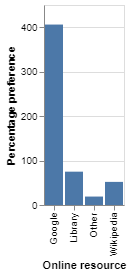

In [15]:
(ips:plot online-bar-chart)

We can see that the source labels are overlapping. Let's fix this by adding a width setting:

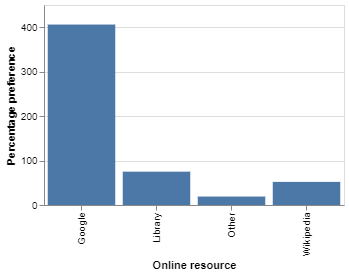

In [16]:
(ips:plot
 (vega:defplot online-bar-chart `(:mark :bar
                                  :width 300
                                  :data ,online
                                  :encoding (:x (:field source :type "nominal"      :title "Online resource")
                                             :y (:field count  :type "quantitative" :title "Percentage preference")))))

You should always consider the best way to order the values in a bar chart. In this case, we will sort X
by the value of Y, decending:

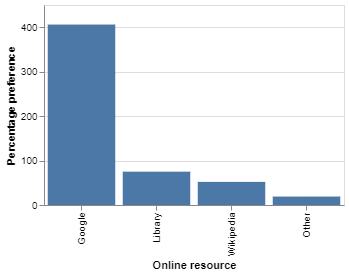

In [17]:
(ips:plot
 (vega:defplot online-bar-chart `(:mark :bar
                                  :width 300
                                  :data ,online
                                  :encoding (:x (:field source :type "nominal"      :title "Online resource" :sort "-y")
                                             :y (:field count  :type "quantitative" :title "Percentage preference")))))

### Example 1.10 Pie chart for the online resource preference data
Figure 1.3 (page 11) displays the same data in a pie chart. We can create a spec and plot the data as pie chart by changing the `mark` and `encoding` parameters.

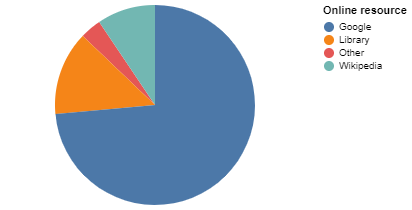

In [18]:
(ips:plot
 (vega:defplot online-bar-chart `(:mark :arc
                                  :width 300
                                  :data ,online
                                  :encoding (:color (:field source :type "nominal" :title "Online resource")
                                             :theta (:field count  :type "quantitative")))))

## Quantitative Variables: Stemplots and histograms
A _stemplot_ (stem-and-leaf plot) provides a quick graphical summary of the shape of a distribution. They are good for small data sets. For larger data sets, histograms work best.

### Example 1.11 Soluble corn fiber and calcium
This example show a stem-and-leaf plot of the effect of soluble corn fiber (SCF) on the absorption of calcium in adolescent boys and girls.

In [19]:
(defdf scf (read-csv ips:eg01-11))

#<DATA-FRAME (46 observations of 3 variables)>

Let's take a high-level look at this data set:

In [20]:
(summary scf)

(23 (50%) x "Control", 23 (50%) x "SCF",  46 reals, min=31, q25=43.166664,
 q50=48.4, q75=55, max=76)

A data-frame of 3 variables and 46 observations. This is small enough for us to print in its entirety. We'll use a helper function, `print-df` that we've added to the `IPS` package to make printing with Lisp-Stat easier when working with notebooks.

In [21]:
(print-df scf)

| ID | TREATMENT | ABSORPTION |
| ---: | :--- | ---: |
| 1 | Control | 42  |
| 2 | Control | 33  |
| 3 | Control | 41  |
| 4 | Control | 49  |
| 5 | Control | 42  |
| 6 | Control | 47  |
| 7 | Control | 48  |
| 8 | Control | 47  |
| 9 | Control | 53  |
| 10 | Control | 72  |
| 11 | Control | 47  |
| 12 | Control | 63  |
| 13 | Control | 68  |
| 14 | Control | 59  |
| 15 | Control | 35  |
| 16 | Control | 46  |
| 17 | Control | 43  |
| 18 | Control | 55  |
| 19 | Control | 38  |
| 20 | Control | 49  |
| 21 | Control | 51  |
| 22 | Control | 51  |
| 23 | Control | 66  |
| 24 | SCF | 50  |
| 25 | SCF | 43  |
| 26 | SCF | 43  |
| 27 | SCF | 44  |
| 28 | SCF | 50  |
| 29 | SCF | 44  |
| 30 | SCF | 35  |
| 31 | SCF | 49  |
| 32 | SCF | 54  |
| 33 | SCF | 76  |
| 34 | SCF | 31  |
| 35 | SCF | 48  |
| 36 | SCF | 61  |
| 37 | SCF | 70  |
| 38 | SCF | 62  |
| 39 | SCF | 47  |
| 40 | SCF | 42  |
| 41 | SCF | 45  |
| 42 | SCF | 43  |
| 43 | SCF | 59  |
| 44 | SCF | 53  |
| 45 | SCF | 53  |
| 46 | SCF | 73  |


We want the treatment group, so we'll use the [select](https://lisp-stat.dev/docs/tasks/select/) package to subset the data from ID 24 to 46:

In [22]:
(stem-and-leaf (select scf (range 23 nil) 'absorption)) ;arrays are 0 based, so we start at 23

NIL

3 | 1 5
4 | 2 3 3 3 4 4 5 7 8 9
5 | 0 0 3 3 4 9
6 | 1 2
7 | 0 3 6


### Example 1.12 Back-to-back stemplot
Example 1.12 compares the data between the SCF and control groups using a back-to-back stemplot.  The values on the left give absorption for the control condition, while the values on the right give absorption when SCF was consumed.  The values for SCF appear to be somewhat higher than the controls.

In [23]:
(back-to-back-stem-and-leaf (select scf (range  0 22)  'absorption)
                            (select scf (range 23 nil) 'absorption))

NIL

                 8 5 3 | 3 | 1 5
 9 9 8 7 7 7 6 3 2 2 1 | 4 | 2 3 3 3 4 4 5 7 8 9
             9 5 3 1 1 | 5 | 0 0 3 3 4 9
                   8 3 | 6 | 1 2
                     2 | 7 | 0 3 6


### Example 1.13 Stemplot with split stems
This example demonstrates *splitting stems* and *trimming* digits in the leaves to fine-tune the display of the stemplot to better observe characteristics of the data. Trimming (rounding) the data can be done using Common Lisp before plotting. Implementing splitting is described in [issue #2](https://github.com/Lisp-Stat/plot/issues/2)

### Example 1.14 - Distribution of IQ scores
This example looks at the IQ scores of 60 fifth-grade studens choosen at random from one school. We know that the distribution should be approximately 'bell shaped' and will draw a histogram to see if it is.

First, load the example data:

In [24]:
(defdf iq-scores (read-csv ips:eg01-14))

#<DATA-FRAME (60 observations of 1 variables)>

and use the `hist` function to generate a histogram and frequency table. Following the instructions in the book, the range is from 75 to 155, with bin width of 10, so:

In [25]:
(plot/text:hist (75 155 10) (mapcar #'plot/text:hist-record (coerce iq-scores:iq 'list)))

NIL

< 75:       0
75:         2       ## 
85:         3       ### 
95:         10      ########## 
105:        16      ################ 
115:        13      ############# 
125:        10      ########## 
135:        5       ##### 
145:        1       # 
> 155:      0


Note that this is a _text_ plot and the cell in the notebook renders markdown, so the numbers are slightly misaligned. If you did this from a REPL they would be aligned exactly. In this example, the `plot/text:hist` function did the binning for us. We can also plot this graphically and use Vega-Lite to do the binning.

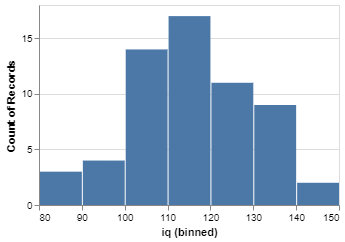

SIMPLE-WARNING: undefined variable: IPS::IQ-PLOT


In [26]:
(ips:plot
 (vega:defplot iq-plot `(:mark :bar
                         :data ,iq-scores
                         :width 300
                         :encoding (:x (:field iq :bin (:maxbin 8))
                                    :y (:aggregate "count")))))

### Example 1.16 Histogram for customer service call lengths
Plot a histogram of the length of calls to a customer service department.  Note that we filter the outliers that are greater than 1200s (20 minutes), and set the `step` size to better see the characteristics of the data.  Such experimentation is often neccessary during the exploration phase.

In [27]:
(defdf call-times (read-csv ips:eg01-16))

#<DATA-FRAME (31492 observations of 1 variables)>

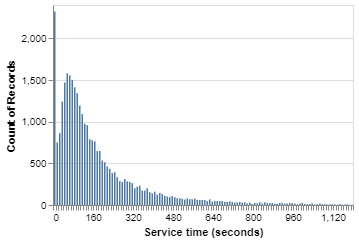

SIMPLE-WARNING: undefined variable: IPS::CALL-PLOT


In [28]:
(ips:plot
 (vega:defplot call-plot `(:mark :bar
                           :data ,(filter-rows call-times '(> 1200 length))
                           :width 300
                           :encoding (:x (:field length :bin (:step 10) :title "Service time (seconds)")
                                      :y (:aggregate "count")))))

Note the striking deviation for calls that are less than 10 seconds long.  This is commonly seen when the service agent metric is to reduce average call times.  The easiest way to do that is to just hang up on the customer!

We can calculate the proportion less than or equal to ten seconds (to replicate the text in figure 1.8 on page 17).  This is done by a non-obvious, but common idiom (at least in R).  We use `e2<` to determine the number of elements that meet our criteria.  The vector returned by `e2<` is the same length as the input, but with TRUE and FALSE values representing the results of applying the predicate.  With that we can take the mean to determine the percentage of values that match our criteria.  This sounds harder than it is.

In [29]:
(mean (e2<= call-times:length 10))

0.07627333926076495d0

This is 7.6% of the calls.

## Dealing with Outliers

### Example 1.19 College students
How does the number of undergraduate university students vary by state?

In [30]:
(defdf college-students (read-csv ips:eg01-19))

#<DATA-FRAME (50 observations of 4 variables)>

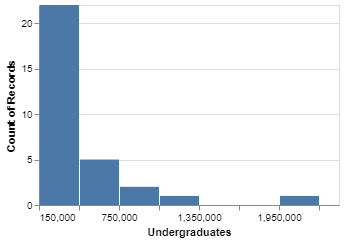

SIMPLE-WARNING: undefined variable: IPS::STUDENT-PLOT


In [31]:
(ips:plot
 (vega:defplot student-plot `(:mark :bar
                              :data ,college-students
                              :width 300
                              :encoding (:x (:field undergrads :bin (:step 300000 :anchor 150000) :title "Undergraduates")
                                         :y (:aggregate "count")))))

In this plot of the number of states by students, we can see an outlier in the bar at the far right.  Let's see what state this is.

In [32]:
(print-df
 (filter-rows college-students `(= undergrads ,(sequence-maximum college-students:undergrads))))

| STATE | UNDERGRADS | POPULATION | UGRADPERTHOU |
| :--- | ---: | ---: | ---: |
| California | 2172354 | 36121296 | 60.1  |


California has about 2 million undergraduates; much more than other states.  However is it really an outlier?  California also has the largest population in the United States, so it should be expected to have a large number of students.  To test this theory, we'll plot the `UGradPerThou` variable in the data set.
### Example 1.20 College students per 1000 population

In [33]:
(stem-and-leaf (map 'vector #'round college-students:ugradperthou)) ; round to nearest whole thousand

NIL

3 | 8
4 | 1 1 1 1 1 3 3 5 5 5 5 6 6 6 7 7 7 7 7 8 8 8 8 9
5 | 0 0 1 1 1 2 2 2 4 4 4 4 5 6 6
6 | 0 0 0 0 1 7 9
7 | 1 2 7


Here California's value of 60 undergraduates per thousand of population doesn't seem unusual, but the state with 77 per thousand looks like an outlier in this view.  

In [34]:
(print-df
 (filter-rows college-students `(> ugradperthou 76)))

| STATE | UNDERGRADS | POPULATION | UGRADPERTHOU |
| :--- | ---: | ---: | ---: |
| Arizona | 476547 | 6178251 | 77.1  |


### Example 1.21 Healthy bones and PTH

In [35]:
(defdf pth (read-csv ips:eg01-21))

#<DATA-FRAME (29 observations of 1 variables)>

In [36]:
(stem-and-leaf pth:pth)

NIL

 1 | 9
 2 | 5 8 8 8 9
 3 | 0 1 1 1 3 5 8 9
 4 | 0 5 6 8 9 9
 5 | 0 0 9 9
 6 | 3 4
 7 | 1 1
 8 |
 9 |
10 |
11 |
12 | 7


127 is an outlier here.  Since the same individual tested in the normal range on a different day, we can conclude this was caused by a
laboratory or reporting error and discard it.

## Time plots
Displays of the distribution of a variable that ignore time order, such as stemplots and histograms, can be misleading when there is a systematic change over time.  Always plot time on the `x` axis and the variable being measured on the `y` axis.

### Example 1.22 Seasonal variation in vitamin D

In [37]:
(load #P"IPS:DATA;vitamin-d")

T

To see the seasonal effects, we'll layer the average over raw data values by date.  The observations are grouped into periods of two months for the year, e.g. Febraury-March, April-May, etc.

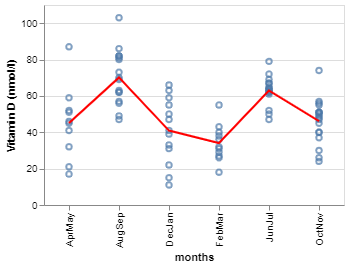

SIMPLE-WARNING: undefined variable: IPS::VD-BY-MTH


In [38]:
(ips:plot
 (vega:defplot vd-by-mth `(:data ,vitamin-d
                           :width 300
                           :layer #((:mark :point
                                     :encoding (:x (:field :months)
                                                :y (:field :vitamind
                                                    :type  :quantitative)))
                                     (:mark (:type :line
                                             :color :red)
                                      :encoding (:x (:field :months)
                                                 :y (:field :vitamind
                                                     :aggregate :mean
                                                     :title "Vitamin D (nmol/l)")))))))

# 1.3 Describing distributions with numbers

Numerical summaries are more specific than graphical summaries. For categorical variables, numerical summaries are the counts or percents that are used to construct pie or bar graphs.  This section focuses on numerical summaries for quantitative variables.  A brief description of the distribution of a quantative variable should include its *shape* and numbers describing its *center* and *spread*.

## Measuring the center: The mean

### Example 1.24 - Mean time to start a business
We start with a data set observing the time to start a business in 24 countries.

In [39]:
(defdf ttsb (read-csv ips::eg01-23))

#<DATA-FRAME (24 observations of 4 variables)>

The stem and leaf plot below (Figure 1.13 in the text) shows us the *shape*, *center* and *spread* of the business start times.

In [40]:
(stem-and-leaf ttsb:time)

NIL

0 | 2 4 5 5 5 5 6 6 7 8
1 | 0 1 2 3 6 7 9 9
2 | 4 5
3 | 2 8
4 | 9
5 | 3


The distribution is skewed to the right, with a long tail of high values.  All but six of the times are less than 20 days.  The centre appears to be about 10 dyas, and the values range from 2 to 53 days.  There do not appear to be any outliers. To compute the mean exactly, use the *mean* function:

In [41]:
(mean ttsb:time)

391/24

and its float value can be computed with:

In [42]:
(round-float (float *) :precision 1) ; * is replaced by the last value, in this case 391/24.  Rounded, as in the text on page 29.

16.3

## Measuring the center: The median
The median M is the midpoint of a distribution.  Half the observations are smaller than the median, and the other half are larger.  We can find the median using the `median` function.

### Example 1.25 - Median time to start a business

In [43]:
(median ttsb:time)

23/2

and in floating point notation:

In [44]:
(round-float (float *) :precision 1)

11.5

## Measuring the spread: The quartiles
We can use the `fivenum` function to find the quartiles.  The **five-number summary** of a set of observations consists of the smallest observation, the first quartile, the median, the third quartile and the largest observation, listed in order from smallest to largest.
### Example 1.26 - Finding quartiles

In [45]:
(fivenum ttsb:time) ; use :tukey t for the R style version of this function

#(2 5.5 11.5 21.5 53)

### Example 1.27 - Call center call lengths
Observe how the data in this sample of call centre call lengths (given in Table 1.2 on page 17) is skewed.  The mean, 197 (calculated previously), is very close to the third quartile.

In [46]:
(load #P"IPS:DATA;sample-call-times") ;(load #P"IPS:DATA;coupons")

T

In [47]:
(fivenum sample-call-times)

#(1 54.5 103.5 200.0 2631)

### Example 1.28 - Boxplots
This example shows a **boxplot** of the IQ scores. A boxplot is a plot of the information in a five-number summary.  The central box spans Q<sub>1</sub> to Q<sub>3</sub>, a line in the middle of the box marks the median, *M*, and the lines extending from the box mark the minimum and maximum values.  Box plots are great for comparing two or more groups; for single sample population a numerical analysis is usually better. 

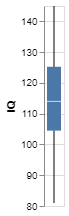

SIMPLE-WARNING: undefined variable: IPS::IQ-BOX-PLOT


In [48]:
(ips:plot
 (vega:defplot iq-box-plot
   `(:data ,iq-scores
     :mark (:type :boxplot
           :extent "min-max")
     :encoding (:y (:field :iq
		            :type :quantitative
		            :scale (:zero :false)
		            :title "IQ")))))

## Interquartile range & outliers

To determine suspected outliers, we use the "1.5 x IQR" rule, where IQR is the *interquartile range* This is defined as the distance betweek the quartiles (the range of the centre half of the data). If a data point is more than 1.5 x IQR above the third quartile (Q<sub>3</sub>) or below the first quartile (Q<sub>1</sub>, we consider it as an outlier.

### Example 1.29 - IQR for call length
We can use the function `interquartile-range` to compute this:

In [49]:
(interquartile-range sample-call-times)

145.5

### Example 1.30 Outliers for call length
We can identify outliers in the `sample-call-times` data set like so:

In [50]:
(let-plus:let+ ((threshold (* 1.5 (interquartile-range sample-call-times)))
                (#(q1 q3) (quantiles sample-call-times '(0.25 0.75)))
                (lower-threshold (- q1 threshold))
                (upper-threshold (+ q3 threshold)))
  (loop
    for x across sample-call-times
    when (or (< x lower-threshold)
             (> x upper-threshold))
      collect x into outliers
    finally (return (sort outliers #'<))))

(438 465 479 700 700 951 1148 2631)

We can see that the outliers are all on the upper end.  We could also use a box plot to see them.

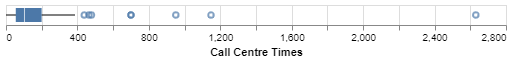

SIMPLE-WARNING: undefined variable: IPS::CALLS-BOX-PLOT


In [51]:
(ips:plot
 (vega:defplot calls-box-plot
   `(:data (:x ,sample-call-times)
     :width 500
     :mark (:type :boxplot)
     :encoding (:x (:field x
                    :type :quantitative
                    :scale (:zero :false)
                    :title "Call Centre Times")))))

### Example 1.31 Do poets die young?
This example examines the lifespans of three types of writers, poets, novelists and non-fiction writers to see if the poets tend to die at a younger age.  We'll compare them with a box plot.

In [52]:
(defdf writers (read-csv ips:eg01-31))

#<DATA-FRAME (123 observations of 3 variables)>

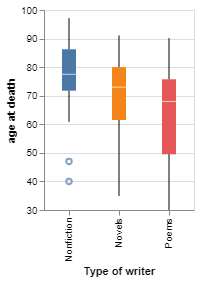

SIMPLE-WARNING: undefined variable: IPS::WRITER-DEATHS


In [53]:
(ips:plot
 (vega:defplot writer-deaths
   `(:data ,writers
     :width 150
     :mark (:type :boxplot)
     :encoding (:x (:field :type
		            :type :nominal
		            :title "Type of writer")
	            :y (:field age
		            :type :quantitative
		            :scale (:zero :false)
		            :title "age at death")
		        :color (:field type
			            :type :nominal
			            :legend nil)))))

It appears the poets do die younger than other writers. Nonfiction writers seem to live the longest, with the exception of two outliers.

## Measuring spread: standard deviation

The most common parameters used to describe a distribution are the `mean`, to measure the centre,
and `standard deviation` to measure the spread.  The standard deviation measures spread by looking at
how far the observations are from their mean.

It is straightforward to calculate the variance and standard deviation within Lisp-Stat.

In [54]:
(def x #(1792 1666 1362 1614 1460 1867 1439))
(sqrt (/ (reduce #'+ (esquare (e- x (mean x))))
         (1- (length x))))

X

189.2397

However it is simpler to use the built-in commands:

In [55]:
(variance x)

107435/3

In [56]:
(float *)  ; call float to convert rational (exact) to a floating point approximation

35811.668

In [57]:
(sd x)

189.23970689753952d0

## Linear transformations
We'll replicate the analyses from example 1.34 (page 45).  Instead of operating directly on a vector, we'll create a data-frame.

In [58]:
(defdf grades (plist-df '(score #(1056 1080 900 1164 1020))))

#<DATA-FRAME (5 observations of 1 variables)>

This time we'll use a convenience function `mean-sd-n` that, as its name suggests, returns the *mean*, *standard-deviation* and the number of observations, *n*.

In [59]:
(mean-sd-n grades:score)

1044

96.37427

5

Now we'll do the linear transformation by adding a column with the scores divided by 4:

In [60]:
(add-column! grades 'points (e/ grades:score 4) t) ; note the last parameter, 't', tells add-column to update the environment so we can refer to the column by name

#<DATA-FRAME (5 observations of 2 variables)>

In [61]:
(mean-sd-n grades:points)

261

24.093567

5